In [114]:
import numpy as np
import sys
np.set_printoptions(threshold=sys.maxsize)
import matplotlib.pyplot as plt
from matplotlib import *
from matplotlib.patches import Circle
sys.path.insert(0, '/home/sudat/athena/vis/python')
import athena_read

In [3]:
datap1 = np.genfromtxt('/home/sudat/one_planet_simulations/disk.hst')
data2p1 = athena_read.athdf('/home/sudat/one_planet_simulations/disk.out1.04000.athdf')
timep1 = datap1[:,0] / (2*np.pi)
sum_torquep1 = datap1[:,10]

densp1 = data2p1.get('dens')[0]
rp1 = data2p1.get('x1v')
phip1 = data2p1.get('x2v')
time2p1 = data2p1.get('Time')
phip1_c = data2p1.get('x2f')
rp1_c = data2p1.get('x1f')

phip1 = phip1[:,None]
d_phip1 = phip1_c[:, None]
d_phip1 = d_phip1[1:] - d_phip1[:-1]
d_rp1 = rp1_c[1:] - rp1_c[:-1]

In [4]:
data = np.genfromtxt('disk.hst')
data2 = athena_read.athdf('disk.out1.04000.athdf')
time = data[:,0] / (2*np.pi)
sum_torque = data[:,10]
sum_torque2 = data[:,11]

dens = data2.get('dens')[0]
r = data2.get('x1v')
phi = data2.get('x2v')
time2 = data2.get('Time')
phi_c= data2.get('x2f')
r_c = data2.get('x1f')

phi = phi[:,None]
d_phi = phi_c[:, None]
d_phi = d_phi[1:] - d_phi[:-1]
d_r = r_c[1:] - r_c[:-1]

In [51]:
'''Conversion from Polar -> Cartesian'''
xp1 = rp1_c[None,:] * np.cos(phip1_c[:,None])
yp1 = rp1_c[None,:] * np.sin(phip1_c[:, None])

In [52]:
'''Conversion from Polar -> Cartesian'''
x = r_c[None,:] * np.cos(phi_c[:,None])
y = r_c[None,:] * np.sin(phi_c[:, None])

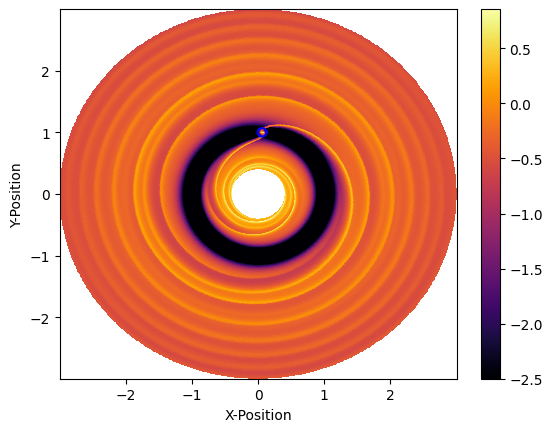

In [233]:
plt.pcolormesh(xp1, yp1, np.log(densp1), cmap='inferno', vmin=-2.5)
plt.xlabel('X-Position')
plt.ylabel('Y-Position')
plt.colorbar()

theta1 = np.linspace( 0 , 2 * np.pi , 360 )
radius1 =  1.0 * np.cbrt(0.000954588/ (3*(1+0.000954588)))
a1 = radius1 * np.cos(theta1) + 0.06
b1 = radius1 * np.sin( theta1 ) + 1
plt.plot(a1,b1, color='blue')

/tmp/ipykernel_151743/1526799462.py:1: RuntimeWarning: divide by zero encountered in log
  plt.pcolormesh(x, y, np.log(dens), cmap='inferno', vmin= -2.5)


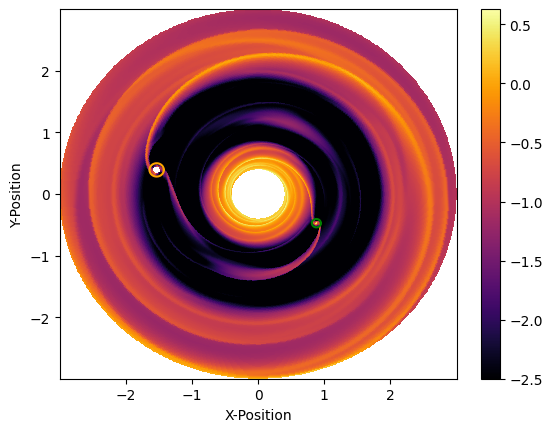

In [243]:
plt.pcolormesh(x, y, np.log(dens), cmap='inferno', vmin= -2.5)
plt.xlabel('X-Position')
plt.ylabel('Y-Position')
plt.colorbar()

theta = np.linspace(0 , 2 * np.pi , 360)
radius =  np.cbrt(4) * np.cbrt(0.000954588/ (3*(1+0.000954588)))
a = radius * np.cos(theta) -1.535
b = radius * np.sin( theta ) + 0.39
plt.plot(a,b, color='orange')

theta2 = np.linspace( 0 , 2 * np.pi , 360 )
radius2 =  1.0 * np.cbrt(0.000954588/ (3*(1+0.000954588)))
a2 = radius2 * np.cos(theta2) + 0.88
b2 = radius2 * np.sin(theta2) - 0.475
plt.plot(a2,b2, color='green')

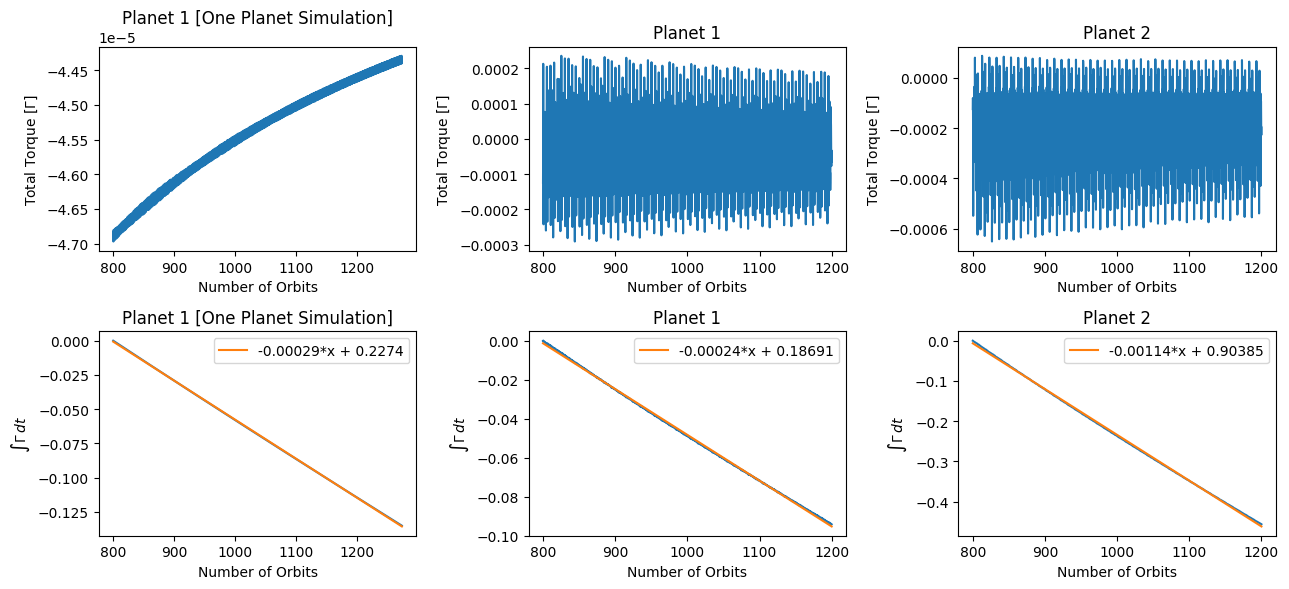

In [8]:
plt.figure(figsize=(13,6))

plt.subplot(231)
plt.plot(timep1[10053:-1], sum_torquep1[10053:-1])
plt.xlabel('Number of Orbits')
plt.ylabel(r'Total Torque [$\Gamma$]')
plt.title('Planet 1 [One Planet Simulation]')

plt.subplot(232)
plt.plot(time[10054:15080], sum_torque[10054:15080])
plt.xlabel('Number of Orbits')
plt.ylabel(r'Total Torque [$\Gamma$]')
plt.title('Planet 1')

plt.subplot(233)
plt.plot(time[10054:15080], sum_torque2[10054:15080])
plt.xlabel('Number of Orbits')
plt.ylabel(r'Total Torque [$\Gamma$]')
plt.title('Planet 2')

plt.subplot(234)
torque_integralp1 = np.cumsum(sum_torquep1[10053:-1] * 0.5)
plt.plot(timep1[10053:-1], torque_integralp1)
plt.ylabel(r'$\int \Gamma \, dt$')
plt.xlabel('Number of Orbits')
plt.title('Planet 1 [One Planet Simulation]')
m,b = np.polyfit(timep1[10053:-1], torque_integralp1, deg=1)
plt.plot(timep1[10053:-1], m*(timep1[10053:-1])+b, label=f'{np.round(m,5)}*x + {np.round(b,5)}')
plt.legend()

plt.subplot(235)
torque_integral = np.cumsum(sum_torque[10054:15080] * 0.5)
plt.plot(time[10054:15080], torque_integral)
plt.ylabel(r'$\int \Gamma \, dt$')
plt.xlabel('Number of Orbits')
plt.title('Planet 1')
m,b = np.polyfit(time[10054:15080], torque_integral, deg=1)
plt.plot(time[10054:15080], m*(time[10054:15080])+b, label=f'{np.round(m,5)}*x + {np.round(b,5)}')
plt.legend()

plt.subplot(236)
torque_integral2 = np.cumsum(sum_torque2[10054:15080] * 0.5)
plt.plot(time[10054:15080], torque_integral2)
plt.ylabel(r'$\int \Gamma \, dt$')
plt.xlabel('Number of Orbits')
plt.title('Planet 2')
m2,b2 = np.polyfit(time[10054:15080], torque_integral2, deg=1)
plt.plot(time[10054:15080], m2*(time[10054:15080])+b2, label=f'{np.round(m2,5)}*x + {np.round(b2,5)}')
plt.legend()

plt.tight_layout()

Total Torque:
$$\Gamma = \iint_{S} \vec{r} \times \vec{g} \, dm \Rightarrow \iint_{S} \Sigma (r, \phi) |\vec{r}| |\vec{g}| \sin\theta \, dA \Rightarrow \iint_{S} \Sigma (r, \phi) r^2 |\vec{g}| \sin\theta \, dr d\phi$$
$$\Gamma_{\Sigma} = \Sigma (r, \phi) |\vec{g}| \sin\theta$$

Torque per unit radius:
$$\frac{\partial \Gamma}{\partial r} = r^2 \int \Sigma (r, \phi) |\vec{g}| \sin\theta \, d\phi \Rightarrow r^2 \int \Gamma_{\Sigma} \, d\phi$$

$$\Gamma = \int \frac{\partial \Gamma}{\partial r} \, dr$$

Torque per unit phi:
$$\frac{\partial \Gamma}{\partial \phi} = \int \Sigma (r, \phi) r^2 |\vec{g}| \sin\theta \, dr \Rightarrow \int \Gamma_{\Sigma} \, dr$$

In [9]:
def initial(r, phi, time2, rp, gm_planet):
    epsilon = 0.3
    gm0 = 1.0
    R_H = rp*np.cbrt(gm_planet/(3*gm0))
    period = 2*np.pi* np.sqrt(rp**3 / gm0)
    phip = 2 * (np.pi / period) * time2
    d = np.sqrt(pow(rp,2) + pow(r,2) - 2*rp*r*np.cos(phi - phip))
    g_mag = -1*((gm_planet*d) / (np.sqrt(pow(pow(d,2) + pow(epsilon,2)*pow(R_H,2), 3))))
    sine_term = (r*rp*np.cos(phi)*np.sin(phip) - r*rp*np.sin(phi)*np.cos(phip)) / (r*d)
    return g_mag, sine_term, d, R_H

In [10]:
r_torquep1 = 0
g_mag = initial(rp1, phip1, time2p1, 1, 0.000954588)[0]
sine_term = initial(rp1, phip1, time2p1, 1, 0.000954588)[1]

r_torquep1 = rp1**2*np.sum(densp1 * g_mag * sine_term * d_phip1, axis=0)

In [11]:
r_torque1 = 0 
g_mag = initial(r, phi, time2, 1, 0.000954588)[0]
sine_term = initial(r, phi, time2, 1, 0.000954588)[1]
 
r_torque1 = r**2*np.sum(dens * g_mag * sine_term * d_phi, axis=0)

In [12]:
r_torque_p2 = 0
g_mag = initial(r, phi, time2, np.cbrt(4), 0.000954588)[0]
sine_term = initial(r, phi, time2, np.cbrt(4), 0.000954588)[1]

r_torque_p2 = r**2*np.sum(dens * g_mag * sine_term * d_phi, axis = 0)

In [13]:
'''Planet 1 One-Planet Simulation'''
sum_r_torque = 0
for i in range(3500,4000):
    data = athena_read.athdf(f'/home/sudat/one_planet_simulations/disk.out1.0{i}.athdf')
    dens = data.get('dens')[0]
    r = data.get('x1v')
    phi = data.get('x2v')
    time2 = data.get('Time')
    d_phi= data.get('x2f')
    d_r = data.get('x1f')

    phi = phi[:,None]
    d_phi = d_phi[:, None]
    d_phi = d_phi[1:] - d_phi[:-1]
    d_r = d_r[1:] - d_r[:-1]

    g_mag = initial(r, phi, time2, 1, 0.000954588)[0]
    sine_term = initial(r, phi, time2, 1, 0.000954588)[1]
    d = initial(r, phi, time2, 1, 0.000954588)[2]
    dens[d<0.5*initial(r, phi, time2, 1, 0.000954588)[3]] = 0
 
    sum_r_torque += r**2*np.sum(dens * g_mag * sine_term * d_phi, axis=0)

r_torque_avgp1 = sum_r_torque/len(range(3500,4000))

In [14]:
'''Planet 1 Two-Planet Simulation'''
sum_r_torque = 0
for i in range(3500,4000):
    data = athena_read.athdf(f'/home/sudat/resonance_two_planet_simulations/disk.out1.0{i}.athdf')
    dens = data.get('dens')[0]
    r = data.get('x1v')
    phi = data.get('x2v')
    time2 = data.get('Time')
    d_phi= data.get('x2f')
    d_r = data.get('x1f')

    phi = phi[:,None]
    d_phi = d_phi[:, None]
    d_phi = d_phi[1:] - d_phi[:-1]
    d_r = d_r[1:] - d_r[:-1]

    g_mag = initial(r, phi, time2, 1, 0.000954588)[0]
    sine_term = initial(r, phi, time2, 1, 0.000954588)[1]
    d = initial(r, phi, time2, 1, 0.000954588)[2]
    dens[d<0.5*initial(r, phi, time2, 1, 0.000954588)[3]] = 0
 
    sum_r_torque += r**2*np.sum(dens * g_mag * sine_term * d_phi, axis=0)

r_torque_avg_p1 = sum_r_torque/len(range(3500,4000))

In [15]:
'''Planet 2'''
sum_r_torque = 0
for i in range(3500,4000):
    data = athena_read.athdf(f'/home/sudat/resonance_two_planet_simulations/disk.out1.0{i}.athdf')
    dens = data.get('dens')[0]
    r = data.get('x1v')
    phi = data.get('x2v')
    time2 = data.get('Time')
    d_phi= data.get('x2f')
    d_r = data.get('x1f')

    phi = phi[:,None]
    d_phi = d_phi[:, None]
    d_phi = d_phi[1:] - d_phi[:-1]
    d_r = d_r[1:] - d_r[:-1]

    g_mag = initial(r, phi, time2, np.cbrt(4), 0.000954588)[0]
    sine_term = initial(r, phi, time2, np.cbrt(4), 0.000954588)[1]
    d = initial(r, phi, time2, np.cbrt(4), 0.000954588)[2]
    dens[d<0.5*initial(r, phi, time2, np.cbrt(4), 0.000954588)[3]] = 0
    sum_r_torque += r**2*np.sum(dens * g_mag * sine_term * d_phi, axis=0)

r_torque_avg_p2 = sum_r_torque / len(range(3500,4000))

$$\frac{\partial \Gamma_{\nu}}{\partial r} = 3 \pi \nu \Sigma r^2 \Omega$$

In [16]:
GM = 1.0
keplerian_vel = np.sqrt(GM / r**3)
nu = 0.01 * (0.05*r)**2 * keplerian_vel
density_initial = (r/1.0)**(-1/2)
viscous_torque = 3 * np.pi * nu * density_initial * r**2 * keplerian_vel

In [17]:
sum_dens_onesim = 0
for i in range(3500,4000):
    data = athena_read.athdf(f'/home/sudat/one_planet_simulations/disk.out1.0{i}.athdf')
    density = data.get('dens')[0]
    d = initial(data.get('x1v'), data.get('x2v')[:,None], data.get('Time'), 1.0, 0.000954588)[2]
    density[d < 0.45 * initial(data.get('x1v'), data.get('x2v')[:,None], data.get('Time'), 1.0, 0.000954588)[3]] = 0.25
    sum_dens_onesim += density

sum_dens_avg_onesim = sum_dens_onesim/len(range(3500,4000))

In [18]:
sum_dens = 0
for i in range(3500,4000):
    data = athena_read.athdf(f'/home/sudat/resonance_two_planet_simulations/disk.out1.0{i}.athdf')
    density = data.get('dens')[0]
    d = initial(data.get('x1v'), data.get('x2v')[:,None], data.get('Time'), np.cbrt(4), 0.000954588)[2]
    density[d < 0.45 * initial(data.get('x1v'), data.get('x2v')[:,None], data.get('Time'), np.cbrt(4), 0.000954588)[3]] = 0.1
    d = initial(data.get('x1v'), data.get('x2v')[:,None], data.get('Time'), 1.0, 0.000954588)[2]
    density[d < 0.45 * initial(data.get('x1v'), data.get('x2v')[:,None], data.get('Time'), 1.0, 0.000954588)[3]] = 0.15
    sum_dens += density

sum_dens_avg = sum_dens/len(range(3500,4000))

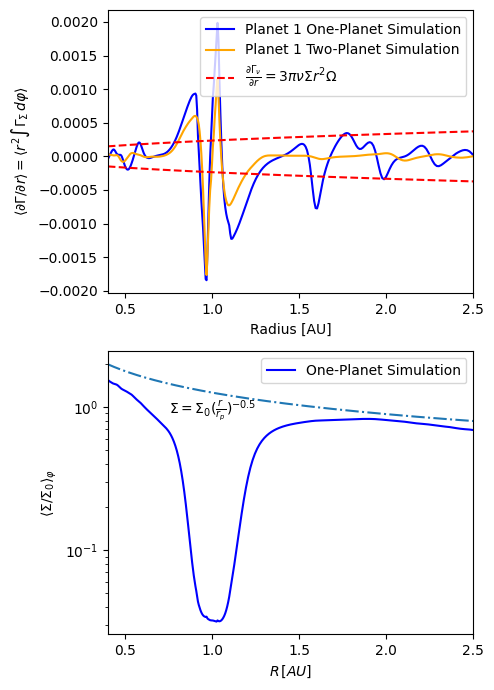

In [246]:
plt.figure(figsize=(5,7))

plt.subplot(211)
plt.plot(rp1, (r_torque_avgp1), label= 'Planet 1 One-Planet Simulation', color='blue')
plt.plot(r, (r_torque_avg_p1), label='Planet 1 Two-Planet Simulation', color='orange')
plt.plot(r, (viscous_torque), color='red', label = r'$\frac{\partial \Gamma_\nu}{\partial r} = 3 \pi \nu \Sigma r^2 \Omega$', linestyle='dashed', linewidth=1.5)
plt.plot(r, -1*(viscous_torque), color='red', linestyle='dashed', linewidth=1.5)
plt.xlabel('Radius [AU]')
plt.xlim(0.4,2.5)
plt.ylabel(r'$\langle {\partial \Gamma} / {\partial r} \rangle = \langle r^2 \int \Gamma_{\Sigma} \, d\varphi \rangle$')
plt.legend()

plt.subplot(212)
plt.plot(r, np.average(sum_dens_avg_onesim, axis = 0), label= 'One-Planet Simulation', color='blue')
plt.plot(r, (r/1.587)**(-1/2), linestyle= '-.')
plt.text(0.75, 0.9, r'$\Sigma = \Sigma_0 (\frac{r}{r_p})^{- 0.5}$')
plt.yscale('log')
plt.ylabel(r'$\langle {\Sigma}/{\Sigma_{0}}\rangle_{\varphi}$')
plt.xlabel(r'$R \,[AU]$')
plt.xlim(0.4, 2.5)
plt.legend()

plt.tight_layout()

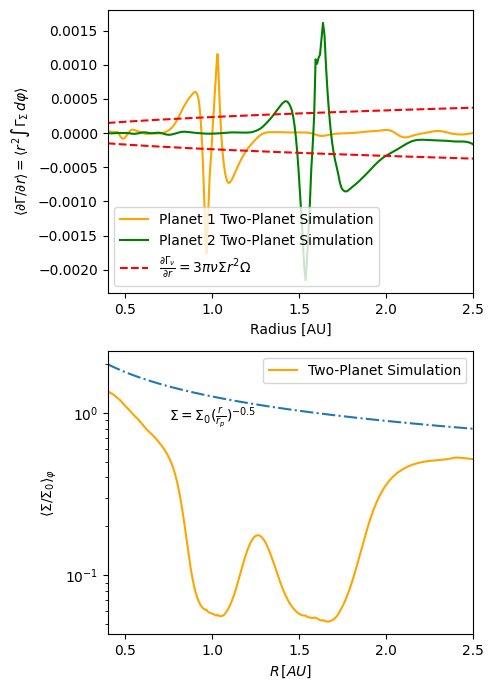

In [107]:
plt.figure(figsize=(5,7))

plt.subplot(211)
plt.plot(r, (r_torque_avg_p1), label='Planet 1 Two-Planet Simulation', color='orange')
plt.plot(r, (r_torque_avg_p2), label= 'Planet 2 Two-Planet Simulation', color='green')
plt.plot(r, (viscous_torque), color='red', label = r'$\frac{\partial \Gamma_\nu}{\partial r} = 3 \pi \nu \Sigma r^2 \Omega$', linestyle='dashed', linewidth=1.5)
plt.plot(r, -1*(viscous_torque), color='red', linestyle='dashed', linewidth=1.5)
plt.xlabel('Radius [AU]')
plt.xlim(0.4,2.5)
plt.ylabel(r'$\langle {\partial \Gamma} / {\partial r} \rangle = \langle r^2 \int \Gamma_{\Sigma} \, d\varphi \rangle$')
plt.legend()

plt.subplot(212)
plt.plot(r, np.average(sum_dens_avg, axis = 0), label = 'Two-Planet Simulation', color='orange')
plt.plot(r, (r/1.587)**(-1/2), linestyle= '-.')
plt.text(0.75, 0.9, r'$\Sigma = \Sigma_0 (\frac{r}{r_p})^{- 0.5}$')
plt.yscale('log')
plt.ylabel(r'$\langle {\Sigma}/{\Sigma_{0}}\rangle_{\varphi}$')
plt.xlabel(r'$R \,[AU]$')
plt.xlim(0.4, 2.5)
plt.legend()

plt.tight_layout()

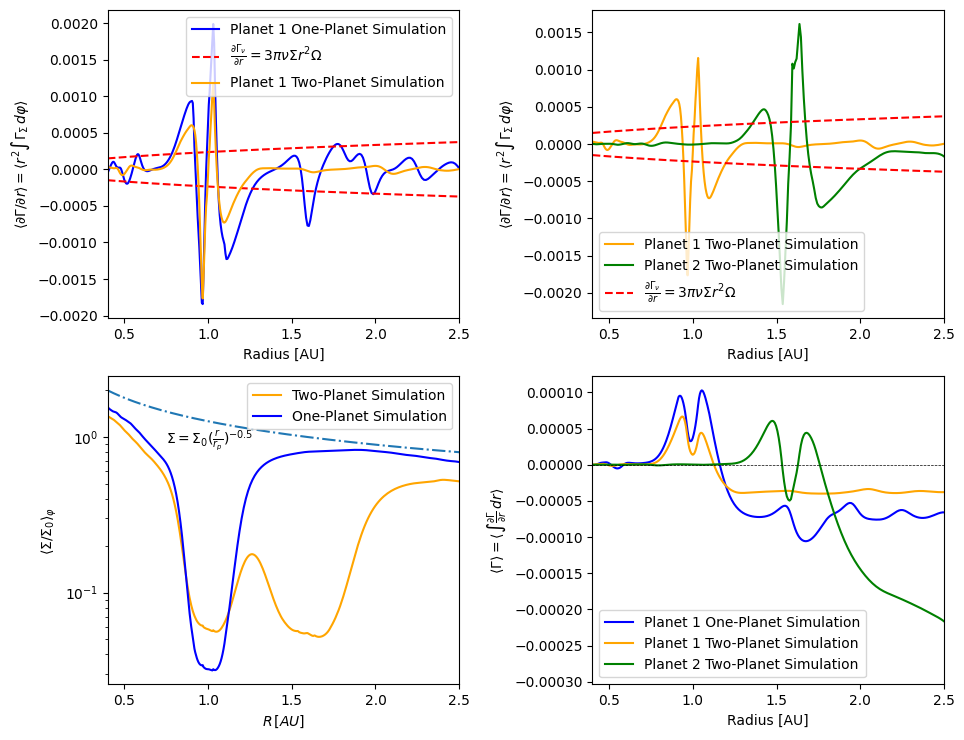

In [241]:
plt.figure(figsize=(9.75,7.5))

plt.subplot(221)
plt.plot(rp1, (r_torque_avgp1), label= 'Planet 1 One-Planet Simulation', color='blue')
plt.plot(r, (viscous_torque), color='red', label = r'$\frac{\partial \Gamma_\nu}{\partial r} = 3 \pi \nu \Sigma r^2 \Omega$', linestyle='dashed', linewidth=1.5)
plt.plot(r, -1*(viscous_torque), color='red', linestyle='dashed', linewidth=1.5)
plt.plot(r, (r_torque_avg_p1), label='Planet 1 Two-Planet Simulation', color='orange')
plt.xlabel('Radius [AU]')
plt.xlim(0.4,2.5)
plt.ylabel(r'$\langle {\partial \Gamma} / {\partial r} \rangle = \langle r^2 \int \Gamma_{\Sigma} \, d\varphi \rangle$')
plt.legend()

plt.subplot(222)
plt.plot(r, (r_torque_avg_p1), label='Planet 1 Two-Planet Simulation', color='orange')
plt.plot(r, (r_torque_avg_p2), label= 'Planet 2 Two-Planet Simulation', color='green')
plt.plot(r, (viscous_torque), color='red', label = r'$\frac{\partial \Gamma_\nu}{\partial r} = 3 \pi \nu \Sigma r^2 \Omega$', linestyle='dashed', linewidth=1.5)
plt.plot(r, -1*(viscous_torque), color='red', linestyle='dashed', linewidth=1.5)
plt.xlabel('Radius [AU]')
plt.xlim(0.4,2.5)
plt.ylabel(r'$\langle {\partial \Gamma} / {\partial r} \rangle = \langle r^2 \int \Gamma_{\Sigma} \, d\varphi \rangle$')
plt.legend()

plt.subplot(223)
plt.plot(r, np.average(sum_dens_avg, axis = 0), label = 'Two-Planet Simulation', color='orange')
plt.plot(r, np.average(sum_dens_avg_onesim, axis = 0), label= 'One-Planet Simulation', color='blue')
plt.plot(r, (r/1.587)**(-1/2), linestyle= '-.')
plt.text(0.75, 0.9, r'$\Sigma = \Sigma_0 (\frac{r}{r_p})^{- 0.5}$')
plt.yscale('log')
plt.ylabel(r'$\langle {\Sigma}/{\Sigma_{0}}\rangle_{\varphi}$')
plt.xlabel(r'$R \,[AU]$')
plt.xlim(0.4, 2.5)
plt.legend()

plt.subplot(224)
plt.plot(rp1, (np.cumsum(r_torque_avgp1 * d_rp1)), label='Planet 1 One-Planet Simulation', color='blue')
plt.plot(r, (np.cumsum(r_torque_avg_p1 * d_r)), label='Planet 1 Two-Planet Simulation', color='orange')
plt.plot(r, (np.cumsum(r_torque_avg_p2* d_r)), label='Planet 2 Two-Planet Simulation', color='green')
plt.axhline(y=0, linestyle='dashed', color='black', linewidth=0.5)
plt.ylabel(r'$\langle \Gamma \rangle = \langle \int \frac{\partial \Gamma}{\partial r} \, dr \rangle$')
plt.xlabel('Radius [AU]')
plt.xlim(0.4,2.5)
plt.legend(loc='lower left')

plt.tight_layout()